,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


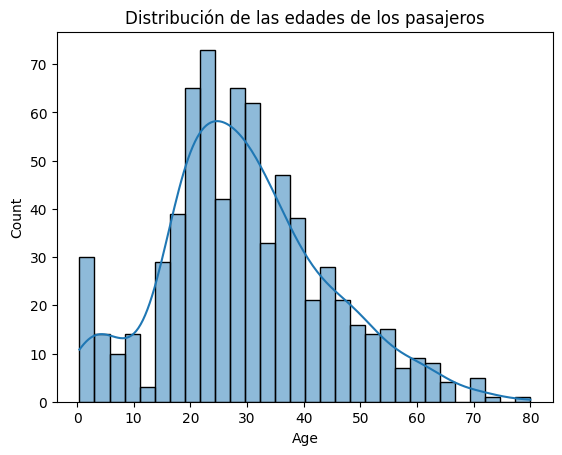

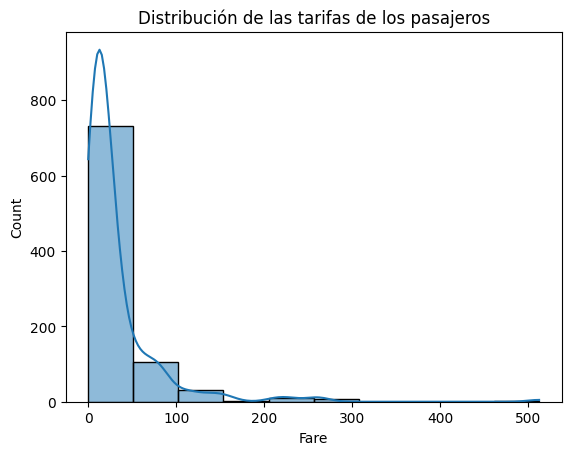

Supervivencia media por sexo:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Supervivencia media por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pc = pd.read_csv("../data/train.csv")

# Voy a mostrar las primeras 5 registros para ver las columnas y recordar el formato
display(pc.head())

sns.histplot(pc["Age"], binsf=30, kde=True)
plt.title("Distribución de las edades de los pasajeros")
plt.show()

sns.histplot(pc["Fare"], bins=10, kde=True)
plt.title("Distribución de las tarifas de los pasajeros")
plt.show()

print("Supervivencia media por sexo:")
print(pc.groupby("Pclass")["Survived"].mean())

print("Supervivencia media por sexo:")
print(pc.groupby("Sex")["Survived"].mean())